# Telling A Story Using Data

<div style="border:solid black 1px; padding: 20px">
<ul>
<li>You’ve decided to open a small robot-run cafe in Los Angeles. </li>
<br/>
<li><b>The project is promising but expensive, so you and your partners decide to try to attract investors.</b></li><br/>
<li>They’re interested in the current market conditions — <font color='red'>will you be able to maintain your success when the novelty of robot waiters wears off?</font></li><br/>
<li>You’re an analytics guru, so your partners have asked you to prepare some market research.
    <ul><li>You have open-source data on restaurants in LA.</li></ul></li>
</ul></div>

<font size=4px; color='red'><b><u>Initialization - Import relevant libraries</u></b></font>

In [1]:
#importing the libraries to be used in analyzing the data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import usaddress
warnings.simplefilter ('ignore')

## Load Data & Explore

In [2]:
df = pd.read_csv('datasets/rest_data_us.csv')
#Getting info about size of the data, attributes, data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 301.7+ KB


* We have a dataset of 9651 entries and 6 columns
* For each establishment there are 6 attributes: 
  * Id
  * name
  * address
  * chain: if it is a chain or not 
  * type
  * number of seats
* id and number of seats of type int, other attributes of type object
* There are 2 NaN values only on the 'chain' column

In [3]:
df.sample(10)

,id,object_name,address,chain,object_type,number
6145,17931,AN DONG KOOK SI,3500 W 6TH ST STE #223,True,Restaurant,29
9016,20802,RANDY'S DONUTS,10250 SANTA MONICA BLVD # 9175,False,Fast Food,20
7254,19040,KHAO SOI BY INTHANON THAI,5907 HOLLYWOOD BLVD,False,Restaurant,26
1188,12974,SOREGASHI,6775 SANTA MONICA BLVD STE 3,False,Restaurant,4
8765,20551,CHIPOTLE MEXICAN GRILL #3119,1122 W 6TH ST # 101,True,Restaurant,19
542,12328,MAGIC FINGERS EAT EM UP,1116 E EL SEGUNDO BLVD,False,Restaurant,15
4759,16545,SUBWAY #23684,6775 SANTA MONICA BLVD STE 9,True,Fast Food,5
6875,18661,HYGGE BAKERY & CAFE,1106 HOPE ST,True,Bakery,16
8062,19848,COFFE TIME,851 1/2 S WESTERN AVE,True,Cafe,35
9166,20952,BLUE BOTTLE COFFEE,13050 SAN VICENTE BLVD # 108,True,Cafe,29


## EDA

In [4]:
def func(pct):
    return "{:1.1f}%".format(pct)

<h3>Types of establishments</h3>

In [5]:
df['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

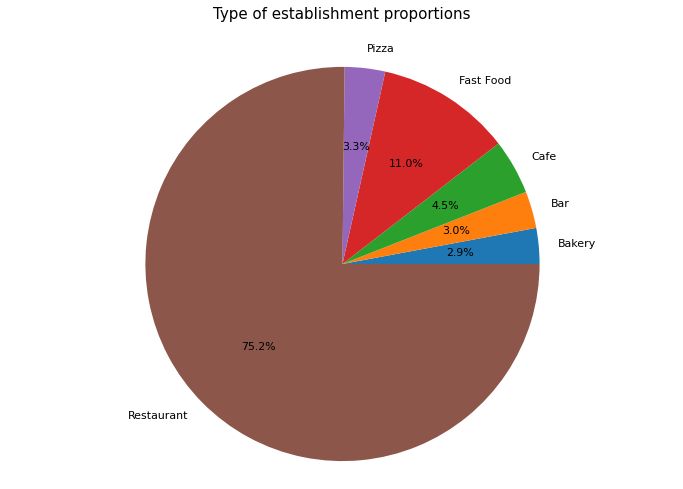

In [6]:
plt.figure(figsize=(12,8))
df.groupby('object_type').size().plot(kind='pie',textprops={'fontsize': 11}, autopct=func)
plt.title('Type of establishment proportions',fontsize=15,y=1.05)
plt.ylabel(None)
plt.axis('equal')
plt.show()

* Restaurant type has the highest frequency among the other types
* Bakery type has the least frequency among the other types
* Bakery and Bar types have very similar values

<h3>Chain and nonchain establishments</h3>

In [7]:
df['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

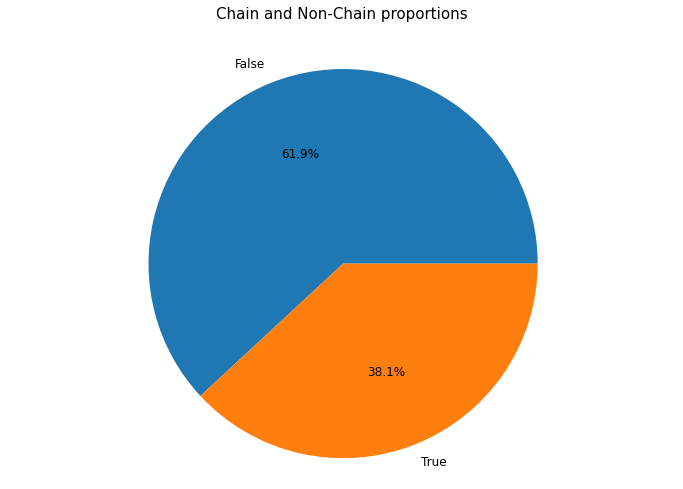

In [8]:
plt.figure(figsize=(12,8))
df.groupby('chain').size().plot(kind='pie',textprops={'fontsize': 12}, autopct=func)
plt.title('Chain and Non-Chain proportions',fontsize=15,y=1.05)
plt.ylabel(None)
plt.axis('equal')
plt.show()

**Non chain establishments have a higher frequency than chain establishments**

<h3>Type of establishment that is typically a chain </h3>

* In the code below:
   * we will remove unnecessary columns
   * group dataframe by object type and chain and calculate the size of each group 
   * Plot a bar graph of the result above

In [9]:
count_total_type = df.groupby(['object_type']).size().reset_index(name='count_total')

In [10]:
df_typesChain=(df.query('chain==1')).drop(['id', 'address', 'object_name','number'], axis=1).groupby(['object_type']).size().reset_index(name='count')

In [11]:
df_typesChain = df_typesChain.merge(count_total_type, left_on=['object_type'], right_on=['object_type'])
df_typesChain['count_ratio'] =  (100*(df_typesChain['count']/df_typesChain['count_total'])).round(2)
df_typesChain.sort_values(by='count_ratio', ascending=False,inplace=True)

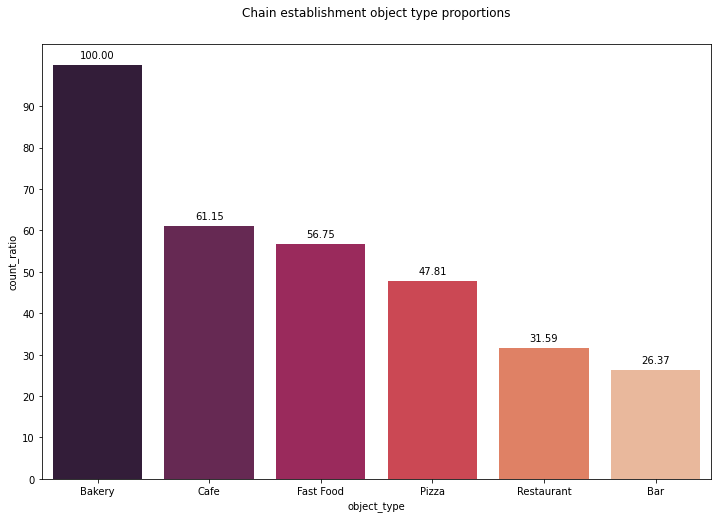

In [12]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='object_type', y='count_ratio', data=df_typesChain,palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.yticks(np.arange(0,100,10))
plt.title('Chain establishment object type proportions',fontsize=12,y=1.05)
plt.show()

**Bakeries are typically a chain**

<h3>Characteristics of a chain</h3>

* We will take an overall look at the values of the seats number 

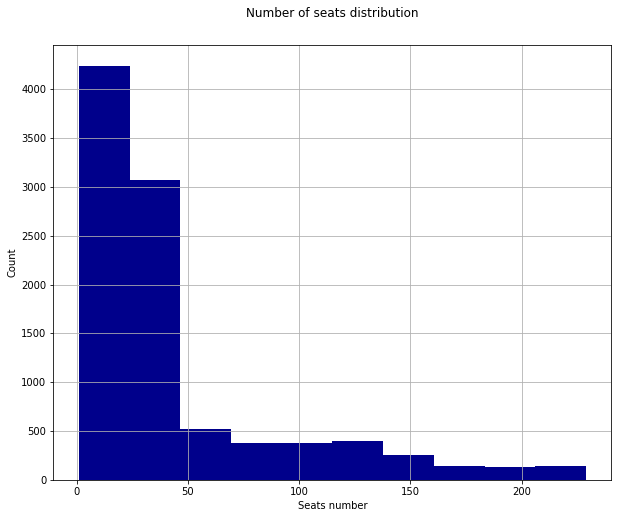

In [13]:
plt.figure(figsize=(10,8))
df['number'].hist(color='darkblue')
plt.title('Number of seats distribution',fontsize=12,y=1.05)
plt.xlabel('Seats number')
plt.ylabel('Count')
plt.show()

* There are 216 unique number of seats, we have 9651 entries(total establishment)
* As we see above there are 204 establishment who have 12 seats for each one 
* That mean that there are standards regarding the number of seats 
* It also relate to the surface size, in the other hand there must be standards because it is not reasonable that this is due to
  * an acciden 
  * mutual surface size

<h4>A Strip Plot for Seats number - Chain vs None Chain </h4>

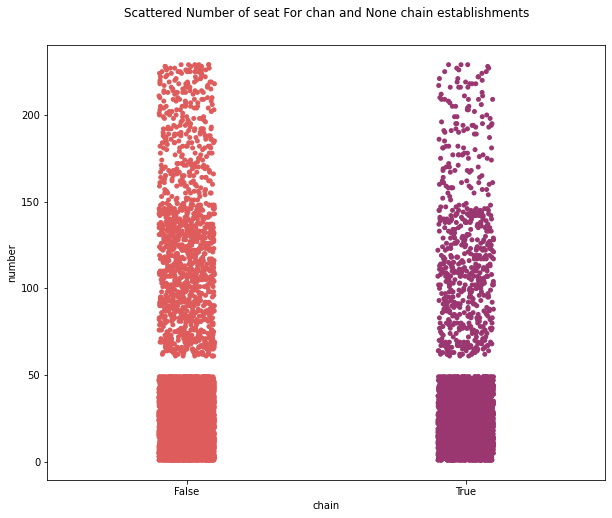

In [14]:
plt.figure(figsize=(10,8))
sns.stripplot(x="chain", y="number", data=df,palette='flare')
plt.title('Scattered Number of seat For chan and None chain establishments',fontsize=12,y=1.05)
plt.show()

* We can see clearly that the chain establishment are less dense than the non chain from 50 seats number and above
  * around the range 52 - 150 non chains are much more dense 
  * from 150 and above, none chains are still higher however the density decreased 

<h4>Chain dataframe</h4>

In [15]:
# create a seperate df for chains
df_chains = (
    df[df['chain'] == 1]
    .groupby('id', as_index=False)
    .agg({'number': sum})
)

In [16]:
df_chains['number'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

* The average number of seats for chains is equal to 40 (rounded) 
* 50% of the chains have up to 25 seats, 75% have up to 44 seats
* From the data above and the graphin the previous step: Chains seems to have small proportions of seats

<h5>Ratio of number of seats for chain establishment</h5>

In [17]:
size_chain_df = df_chains.shape[0]
under_50 = len(df_chains.query('number <= 50'))
above_50 = len(df_chains.query('number > 50'))
print('chain type - ratio of establishment with small number of seats {:.2%}'.format(under_50/size_chain_df))
print('chain type - ratio of establishment with many number of seats {:.2%}'.format(above_50/size_chain_df))

chain type - ratio of establishment with small number of seats 82.51%
chain type - ratio of establishment with many number of seats 17.49%


**82.5% of the chains have up to 50 seats**

<h5>Scatter plot graph for seats number and restaurants count</h5>

* We will group the dataseat by number of seats and their counts i.e this will return table with two columns:
  - the first column with unique number of seats 
  - the second column is the share of resturants who have the same number of seats (count)

In [18]:
df_chain_countMutSeat = df_chains.groupby(['number']).size().reset_index(name='count')
df_chain_countMutSeat.columns = ['seats_number','restaurants_count']

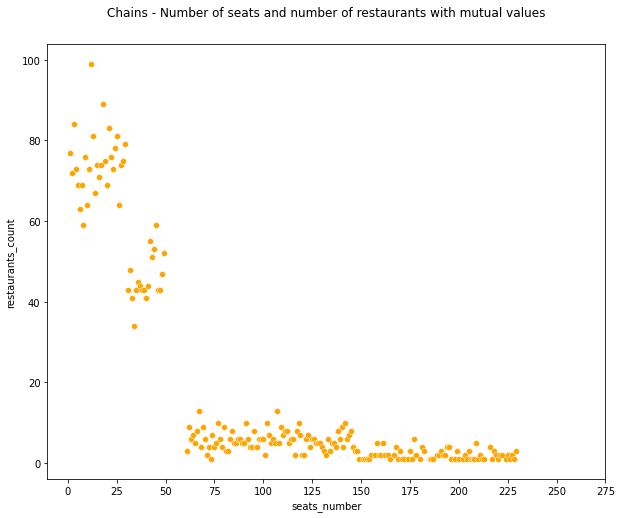

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_chain_countMutSeat, x="seats_number", y="restaurants_count",color='orange')
plt.xticks(np.arange(0, 300, 25)) 
plt.title('Chains - Number of seats and number of restaurants with mutual values',fontsize=12,y=1.05)
plt.show();


* As we can see that for seats number between 1-25 resturant count got to its highest point 60-100 
* between 25-50 seats, the resturants counts are between 40-60 
* between 60 -140 seats, the restaurants count are between 1-20
* between 140-225, the restaurants count are between 1-10  
* i.e As the number of seats increase restaurants count decrease - inverse relation

**Chains in general have many establishment with a small number of seats**
* each step above proved again that chains have small number of seats

<h3>The average number of seats for each type of establishment</h3>

* In the code below 
  * we will group the data by object type 
  * for each group calculate: mean, median, sum, min, max

In [20]:
df_seatsNum = (
    df
    .groupby('object_type', as_index=False)
    .agg({'number': [np.mean,np.median,sum,min,max]})
)
df_seatsNum = df_seatsNum.droplevel(0, axis=1)
df_seatsNum.rename(columns = {'' : 'object_type'}, inplace = True)
df_seatsNum.sort_values(by='mean', ascending=False, inplace=True)
display(df_seatsNum)

,object_type,mean,median,sum,min,max
5,Restaurant,48.042316,29.0,348547,1,229
1,Bar,44.767123,28.5,13072,1,227
3,Fast Food,31.837711,21.0,33939,1,227
4,Pizza,28.459375,18.5,9107,1,216
2,Cafe,25.000000,21.0,10875,1,143
0,Bakery,21.773852,18.0,6162,1,218


* Restaurants have the highest number of seats in average 
* Bakeries have the lowest number of seats in average
* Restaurant has the highest max value among all the other types of establishment

<h5>Graph - Average number of seats for each type</h5>

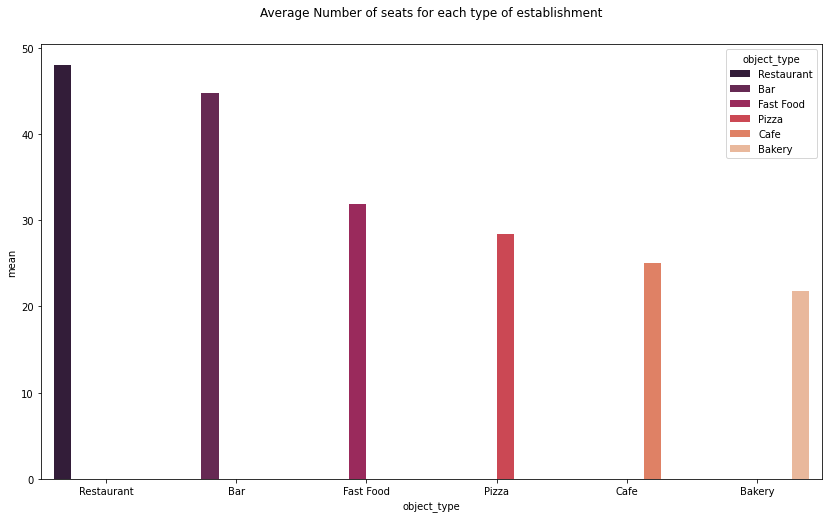

In [21]:
plt.figure(figsize=(14,8))
sns.barplot(x='object_type',y='mean',hue='object_type',data=df_seatsNum,palette="rocket");
plt.title('Average Number of seats for each type of establishment',fontsize=12,y=1.05)
plt.show()

**Restaurants got the highest average, it beats the Bar avergae with only 0.5** 

Index(['Restaurant', 'Fast Food', 'Cafe', 'Pizza', 'Bar', 'Bakery'], dtype='object', name='object_type')


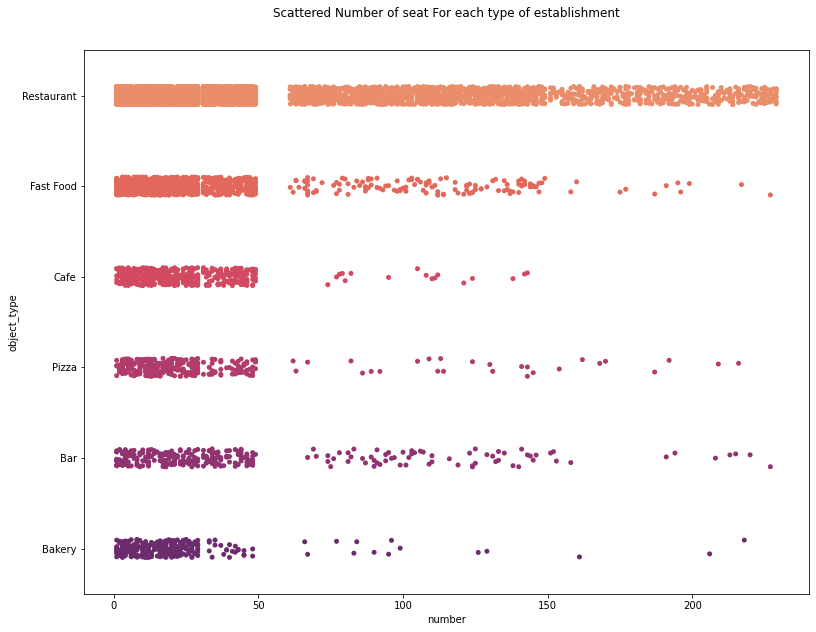

In [22]:
larger_to_small = df.groupby('object_type').size().sort_values().index[::-1]
print(larger_to_small)
plt.figure(figsize=(13,10))
sns.stripplot(y="object_type", x="number", data=df,order=larger_to_small,palette='flare')
plt.title('Scattered Number of seat For each type of establishment',fontsize=12,y=1.05)
plt.show()

* It is reasonable enough that restaurants have the highest number of seats restaurants people tend to sit and have their meals there rather than do 'takeaway'
  * In restaurants people tend to sit for a long period of time
  * In restaurants customers come within a large group: families, colleagues, friends ...etc.
  * In the other types it can be more 'takeaway, people spend less time there, and they come within a small group

<h3>Add A New Column 'Street'</h3>

* Below we have a method that take the address, clear all unnecessary chars return street name
* Add the street name to the entry 

In [23]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        if i[1] in dict_address.keys():
            #creates a list of all names that are relevant to this key
            all_names=[el[0] for el in list(filter(lambda x:x[1]==i[1],raw_address))]
            #join the names into strings
            clean_full=' '.join(all_names)
            dict_address[i[1]]=clean_full
        else:
            dict_address[i[1]]=i[0]
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [24]:
df['clean_street_check']=df.address.apply(cleaning_check)

In [25]:
df[df['clean_street_check']=='no street or number']

,id,object_name,address,chain,object_type,number,clean_street_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [26]:
def cleaning_tag(raw):
    try:
        if raw.startswith('OLVERA'):
            clean_adress='OLVERA'
        elif raw.startswith('1033 1/2 LOS ANGELES'):
            clean_adress='1033 1/2 LOS ANGELES ST'
        elif raw.startswith('3425 E 1ST ST SO. 3RDFL'):
            clean_adress='3425 E 1ST ST SO. 3RDFL'
        else:
            clean_adress=usaddress.tag(raw)[0]['StreetName']
    except:
        clean_adress='no street'
    return clean_adress

In [27]:
#example of my final code
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            if i[1] in dict_address.keys():
                #creates a list of all names that are relevant to this key
                all_names=[el[0] for el in list(filter(lambda x:x[1]==i[1],raw_address))]
                #join the names into strings
                clean_full=' '.join(all_names)
                dict_address[i[1]]=clean_full
            else:
                dict_address[i[1]]=i[0]
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])
    return clean_adress

In [28]:
df['street']=df.address.apply(cleaning_tag)
df.sample(10)

,id,object_name,address,chain,object_type,number,clean_street_check,street
8742,20528,GREEN LEAF @ USC,929 W JEFFERSON BLVD # 1500,False,Restaurant,43,"929,JEFFERSON",JEFFERSON
8230,20016,RUBY THAI KITCHEN,10800 W PICO BLVD # 324,False,Restaurant,6,"10800,PICO",PICO
3294,15080,FRESH BROTHERS PIZZA,200 WORLD WAY # T235,True,Pizza,37,"200,WORLD",WORLD
8991,20777,HANNA MATZIP,1600 W SLAUSON AVE # A18,False,Restaurant,2,"1600,SLAUSON",SLAUSON
6239,18025,HARD TIMES PIZZA,1311 N GLENDALE BLVD STE #G,False,Pizza,5,"1311,GLENDALE",GLENDALE
7864,19650,LOCK & KEY,239 S VERMONT AVE,False,Restaurant,93,"239,VERMONT",VERMONT
753,12539,PORKY'S RESTAURANT MEXICAN FOOD,4560 WHITTIER BLVD,True,Restaurant,84,"4560,WHITTIER",WHITTIER
4796,16582,ALEJANDRA'S BAKERY,9715 S NORMANDIE AVE,True,Bakery,16,"9715,NORMANDIE",NORMANDIE
8763,20549,JAFFA RESTAURANT,8048 W 3RD ST,True,Restaurant,48,"8048,3RD",3RD
6376,18162,LA DESERT,2869 S ROBERTSON BLVD,False,Restaurant,28,"2869,ROBERTSON",ROBERTSON


<h3>Top ten streets</h3>

* In the code below, we will 
  * group the data by street name
  * calculate sum of all establishments
  * calculate sum of all seats number 

In [29]:
df_streets = (
    df
    .groupby('street', as_index=False)
    .agg({'id': pd.Series.nunique,'number':sum})
)
df_streets.columns = ['street','restaurant_count','total_seat_num']

In [30]:
df_streets.sort_values(by='restaurant_count',ascending=False,inplace=True)
print(df_streets.shape[0])

489


* There are 489 unique streets
* In total all of the 9701 establishment located in 489 different streets 

In [31]:
df_streets['restaurant_count'].describe()

count    489.000000
mean      19.736196
std       53.451429
min        1.000000
25%        1.000000
50%        2.000000
75%        9.000000
max      404.000000
Name: restaurant_count, dtype: float64

* In one street there are 404 different establishments, it is absolutely a massive and unusual proportion 

In [32]:
df_streets_top10 = df_streets[:10]
display(df_streets_top10[['street','restaurant_count']])

,street,restaurant_count
421,SUNSET,404
471,WILSHIRE,398
361,PICO,370
461,WESTERN,369
180,FIGUEROA,334
343,OLYMPIC,309
445,VERMONT,288
391,SANTA MONICA,264
26,3RD,263
225,HOLLYWOOD,253


* SUNSET is on the top rank with total of 404 different establishment
* There is a significant difference between resturant count of the 1th street and 10th st

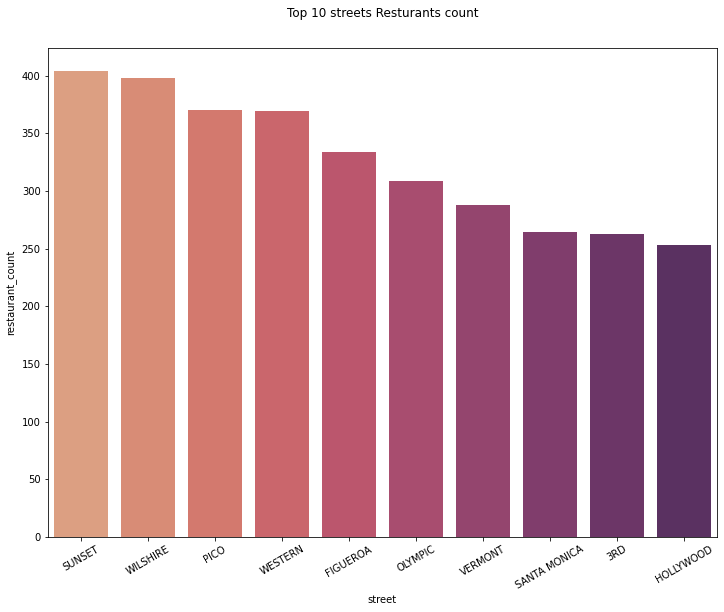

In [33]:
plt.figure(figsize=(12,9))
sns.barplot(x="street", y="restaurant_count", data=df_streets_top10 ,palette='flare')
plt.title('Top 10 streets Resturants count',fontsize=12,y=1.05)
plt.xticks(rotation='30')
plt.show()

<h3>Streets that only have one restaurant </h3>

In [34]:
df_one_rest = df_streets.query('restaurant_count == 1')
print(len(df_one_rest))

201


* There are 201 streets with only one establishment 
* In total there are 9651 establishments, and 489 unique streets
* That mean that the other 8646 establishments are located in 288 unique streets (488-201=288)

<h3>Distribution of number of seats for restaurans located on the Top 10 Streets</h3>

In [35]:
top_10_streets = df_streets['street'][:10]
df_streets_10 = (df_streets[:10]).drop(['total_seat_num'],axis=1)
df_pop_street = df[df['street'].isin(top_10_streets)]
df_other_street = df[~df['street'].isin(top_10_streets)]

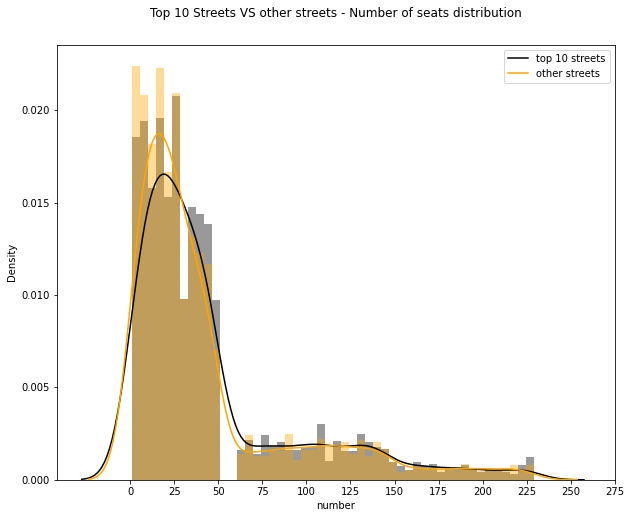

In [36]:
plt.figure(figsize=(10,8))
fig = sns.distplot(df_pop_street['number'],color='black')
fig = sns.distplot(df_other_street['number'],color='orange')
plt.xticks(np.arange(0, 300, 25)) 
plt.title('Top 10 Streets VS other streets - Number of seats distribution',fontsize=12,y=1.05)
plt.legend(labels=["top 10 streets","other streets"])
plt.show();

* The orange curve was below the black one from 40 seats number to 275 for most of the cases
* We can see that the density of the establishments with large number of seats is larger than this of the whole dataset

In [37]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)
def q95(x):
    return x.quantile(0.95)

In [38]:
df_streets_seats = (
    df_pop_street
    .groupby('street')
    .agg({'number':[sum,min,max,q1,q2,q3,q95]})
)

df_streets_seats = df_streets_seats.xs('number', axis=1, drop_level=True)

In [39]:
df_streets_seats.sort_values(by='sum',ascending=False,inplace=True)
df_streets_seats_10 = (df_streets_seats[:10]).reset_index()
display(df_streets_seats_10)

,street,sum,min,max,q1,q2,q3,q95
0,WILSHIRE,20957,1,229,19.0,36.0,68.50,164.45
1,SUNSET,19391,1,229,16.0,34.0,49.00,157.70
2,WESTERN,15256,1,213,14.0,29.0,45.00,138.60
3,OLYMPIC,15246,1,226,15.0,29.0,47.00,184.40
4,FIGUEROA,15047,1,226,14.0,25.0,47.00,157.70
5,PICO,15034,1,221,14.0,27.0,45.00,135.55
6,HOLLYWOOD,14433,1,229,17.0,34.0,81.00,182.40
7,VERMONT,13067,1,227,17.0,28.0,46.25,140.65
8,3RD,10660,1,217,13.5,26.0,44.00,136.90
9,SANTA MONICA,9252,1,225,11.0,22.0,41.25,119.85


* Three streets have mutual max value for seats number 
   * SUNSET, WILSHIRE, HOLLYWOOD
* Min value is the same for all of them, max value start from 213 to 229
* There is a significant gap between the max and min of total seats number  
* In general most of the establishment with large number of seats are located in these streets 

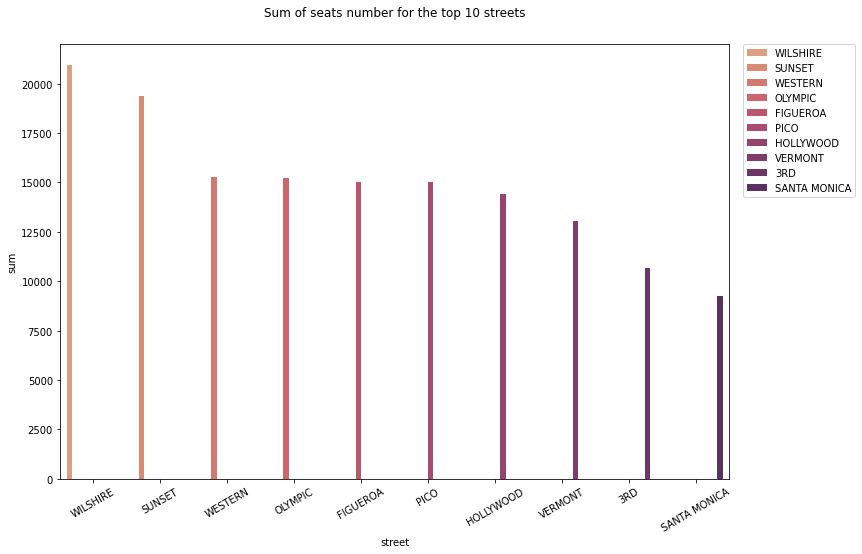

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x='street', y='sum', hue='street', data=df_streets_seats_10,palette="flare") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation='30')
plt.title('Sum of seats number for the top 10 streets',fontsize=12,y=1.05)
plt.show()           

* WILSHIRE beats sunset on getting the first rank on terms if of total num seats
* In general in the top 10 streets, the density of seats number are larger in comparison to this of the whole data

<h4>Top ten sreets establishment types distribution</h4>

In [41]:
df_pop_street['object_type'].value_counts()

Restaurant    2509
Fast Food      301
Cafe           145
Pizza          118
Bakery          97
Bar             82
Name: object_type, dtype: int64

In [42]:
df_pop_street_types = df_pop_street.drop(['id', 'address', 'object_name','number'], axis=1).groupby(['street','object_type']).size().reset_index(name='count')
df_pop_street_types = df_pop_street_types.merge(df_streets_10, left_on=['street'], right_on=['street'])
df_pop_street_types['count'] =  (100*(df_pop_street_types['count']/df_pop_street_types['restaurant_count'])).round(2)
df_pop_street_types.sort_values(by='restaurant_count',ascending=False,inplace=True)
df_pop_street_types.sample(5)

,street,object_type,count,restaurant_count
16,HOLLYWOOD,Pizza,4.35,253
31,SANTA MONICA,Bar,2.27,264
12,HOLLYWOOD,Bakery,1.58,253
1,3RD,Bar,1.90,263
43,VERMONT,Bar,1.04,288


In [43]:
streets_names_pop = df_pop_street_types['street'].unique()



                                      Object type distribution for top 10 streets                                       




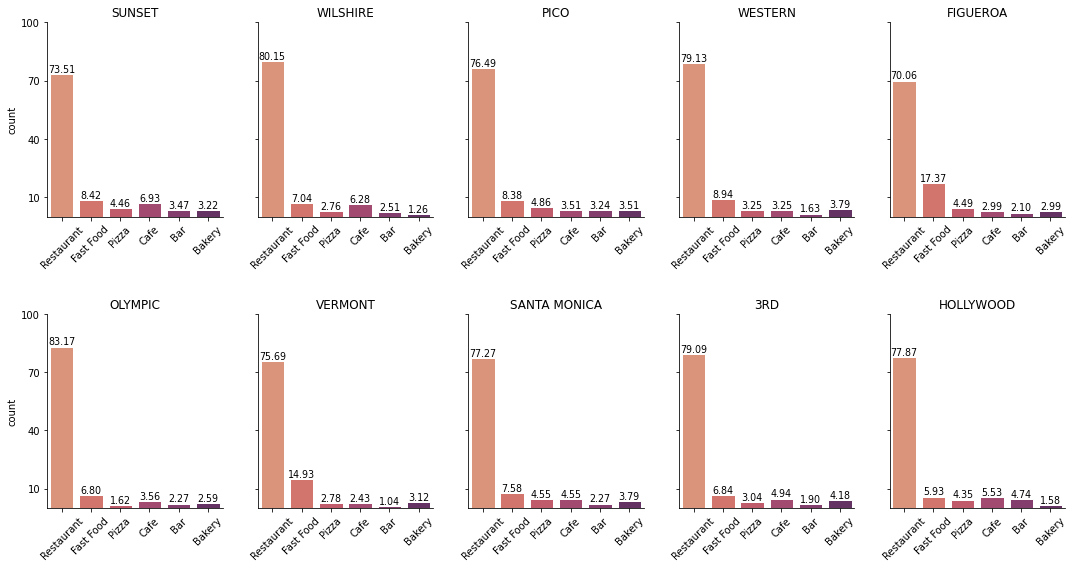

In [44]:
print()
print()
print(("Object type distribution for top 10 streets").center(120))
print()
print()
g = sns.FacetGrid(df_pop_street_types, col="street",col_wrap=5, height=4, aspect=0.75,sharex=False)
g.map(sns.barplot, "object_type","count",palette="flare",edgecolor="white",linewidth=1,color=".3", ci=None,
     order = ['Restaurant','Fast Food','Pizza','Cafe','Bar','Bakery'])
g.set(xlabel=None,yticks=np.arange(10,101,30))

for axes,street in zip(g.axes.flat,streets_names_pop):
    axes.set_title(street)
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=45)

for ax in g.axes:
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9.5, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.xticks()
plt.show()

* Reminder: Type objects ranks - the complete dataset:
1. Restaurants
2. Fast Food
3. Cafe
4. Pizza
5. Bar
6. Bakery

* The detailed sub graphs for each one of the top 10 streets look different somehow from the cumulative graph from section 2.1
* There are no significant gap between the ratio of the same establishments type in comparison to the cumulative ratio of the same establishments type (max difference 9%) 
* The difference is on the ranks order
* On the top rank  and the second rank there are no changes: 1. Restaurants 2. Fast Food
* ranks 3-6 - dynamic ranks: 
  * type Cafe's ranks range 3-5
  * type Pizza ranks range 3-6
  * type Bar ranks range 4-6  
  * type Bakery ranks range 3-6

<h3>Recommendation</h3>

In [45]:
df_pop_street.query('object_type == "Bakery"')['number'].describe()

count     97.000000
mean      23.855670
std       29.205447
min        1.000000
25%        9.000000
50%       18.000000
75%       26.000000
max      218.000000
Name: number, dtype: float64

In [46]:
df_pop_street.query('object_type == "Bakery"')['number'].unique()

array([ 17,  26,  15,  35,  16,   5,  23,  10,   1,  11,  29,   8,  12,
        18,   2,  20,   3,  45,  21,   6,  83,  33,  25,  13,  22,  48,
        66,  95,  96, 218,  24,  28,   4,  27,  14, 126,  19,   7,  34,
        84,   9,  37,  40], dtype=int64)

* Mean value for seats number for bakery establishments in the  top 10 streets is 23.58
* In the possible values of the seats number the closets value to the mean is 24

* Bakeries are the the least frequent type, there might be a bakery shortage 
* Bakery establishment with 24 seats
* According to the data above all of the bakeries are part of a chain(* i.e. There is a good chance to develop a chain)
  * It will be challenging to open a small bakery among other bakeries that belong to some popular chains because many people prefer to stick to one place and it become their favorite 
  * On the other hand, there are people who always want to try new things, places, etc… and people who prefer places with a short queue or semi-empty places. our small bakery is the right place for those people

<h2>Conclusion</h2>

* In the first stage we load the data, and took an overall look
  * dataframe contains 9651 entries and 6 columns
* In the second stage we perfomed data Analysis, found:
  * Regarding Type of establishment:
    * Restaurant type has the highest frequency among the other types
    * Bakeries type has the least frequency among the other types
    * Bakery and Bar types have very similar values
  * Non chain establishments have a higher frequency than chain establishments
  * Bakeries are typically a chain
  * Chains in general have many establishment with a small number of seats
  * Restaurants have the highest number of seats in average 
  * Bakeries have the lowest number of seats in average 
  * There are 489 unique streets
  * There are 201 streets with only one establishment 
  * In total all of the 9701 establishment located in 1602 different streets 
  * SUNSET is on the top rank, in terms of: 
    * The street with the highest establishment number
  * WILSHIRE is on the top rank, in terms of:
    * The street with the highest number of seats
  * In general in the top 10 streets, the density of seats number looks larger in comparison to this of the whole data
* According to the findings above, it is preferable to open a Bakery establishment: 
  * They are the the least frequent type, there might be a bakery shortage 
  * Seats number 24, it is the closet to the mean value of seats in bakeries on top 10 streets
     * Mean value for seats number for bakery establishments in the top 10 streets is 23.58
     * There is a good chance to develope a chain

## Data Presentation

https://drive.google.com/file/d/1JkaokM3tgHn6aUHv3ZCYGidv_5ldnK3j/view?usp=sharing